In [60]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, kruskal, linregress

csvpath = os.path.join("California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

columns_to_drop = ['Active', 'Featured', 'Final', 'PercentContained', 'Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)

# Convert datetime columns with UTC timezone parsing
calfire['Started'] = pd.to_datetime(calfire['Started'], format='ISO8601')
calfire['Updated'] = pd.to_datetime(calfire['Updated'], format='ISO8601')
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'], format='ISO8601')

calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]

# Fill NA values
calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)

# Convert to appropriate integer types
int_columns = ['AcresBurned', 'AirTankers', 'CrewsInvolved', 'Dozers', 'Engines', 
               'Fatalities', 'Injuries', 'Helicopters', 'PersonnelInvolved', 
               'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 
               'StructuresThreatened', 'WaterTenders']

for col in int_columns:
    calfire[col] = calfire[col].astype('int64')

# Return the DataFrame
calfire

,AcresBurned,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PersonnelInvolved,SearchDescription,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,YearStarted,MonthStarted
0,257314,Stanislaus National Forest/Yosemite National Park,0,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,55,0,0,0,2013-09-06 18:30:00+00:00,0,,0,0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,0,The Rim Fire was east of Groveland along Highw...,2013-08-17 15:25:00+00:00,0,0,0,0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06 18:30:00+00:00,0,2013,8
1,30274,USFS Angeles National Forest/Los Angeles Count...,0,2013,True,/incidents/2013/5/30/powerhouse-fire/,,,Los Angeles,19,0,0,0,2013-06-08 18:30:00+00:00,0,,0,0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,0,The Powerhouse Fire burned in May and June 201...,2013-05-30 15:28:00+00:00,0,0,0,0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08 18:30:00+00:00,0,2013,5
2,27531,CAL FIRE Riverside Unit / San Bernardino Natio...,0,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,33,0,0,0,2013-07-30 18:00:00+00:00,0,,0,0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,0,The Mountain Fire burned in July 2013 off High...,2013-07-15 13:43:00+00:00,0,0,0,0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30 18:00:00+00:00,0,2013,7
3,27440,Tahoe National Forest,0,2013,False,/incidents/2013/8/10/american-fire/,,,Placer,31,0,0,0,2013-08-30 08:00:00+00:00,0,,0,0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,0,The American Fire burned in August 2013 off De...,2013-08-10 16:30:00+00:00,0,0,0,0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30 08:00:00+00:00,0,2013,8
4,24251,Ventura County Fire/CAL FIRE,0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,56,47,8,117,2013-05-11 06:30:00+00:00,0,,11,10,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,2167,"The Springs Fire burned in May 2013, Southboun...",2013-05-02 07:01:00+00:00,6,10,0,0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11 06:30:00+00:00,11,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9,CAL FIRE / Riverside County Fire,0,2019,True,/incidents/2019/10/10/eagle-fire/,,,Riverside,33,0,0,0,2019-10-10 18:11:00+00:00,0,,0,0,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,0,"The Eagle Fire started on October 10, 2019 nea...",2019-10-10 12:08:00+00:00,0,0,0,0,6e93b252-99a3-4214-9921-238373b17535,2019-10-10 18:11:59.733000+00:00,0,2019,10
1632,2,CAL FIRE Nevada-Yuba-Placer Unit,0,2019,True,/incidents/2019/6/28/long-fire/,,,Nevada,29,0,0,0,2019-06-28 17:33:00+00:00,0,,0,0,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,0,"Long Fire started on June 28, 2019 off of Long...",2019-06-28 15:03:04+00:00,0,0,0,0,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30 15:52:01.023000+00:00,0,2019,6
1633,0,Yolo County Fire Protection District,0,2019,False,/incidents/2019/11/25/cashe-fire/,,,Yolo,57,0,0,0,0,0,,0,0,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,False,Cashe Fire,0,"The Cashe Fire started November 25, 2019 off C...",2019-11-25 12:02:02+00:00,0,0,0,0,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03 16:35:20.930000+00:00,0,2019,11
1634,0,Camp Pendleton Marine Corps Base,0,2019,False,/incidents/2019/10/22/oak-fire/,,,San Diego,37,0,0,0,0,0,,0,0,33.351145,"Near Basilone Road and Las Pulgas Road, near C...",-117.403719,False,Oak Fire,0,"The Oak Fire started October 22, 2019 off near...",2019-

In [61]:
# Group data by MonthStarted and count the number of fires
fires_by_month = calfire.groupby('MonthStarted').size()
x = fires_by_month.index
y = fires_by_month.values


In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate correlation between MonthStarted and AcresBurned
month_acres_corr, p_value = pearsonr(calfire['MonthStarted'], calfire['AcresBurned'])

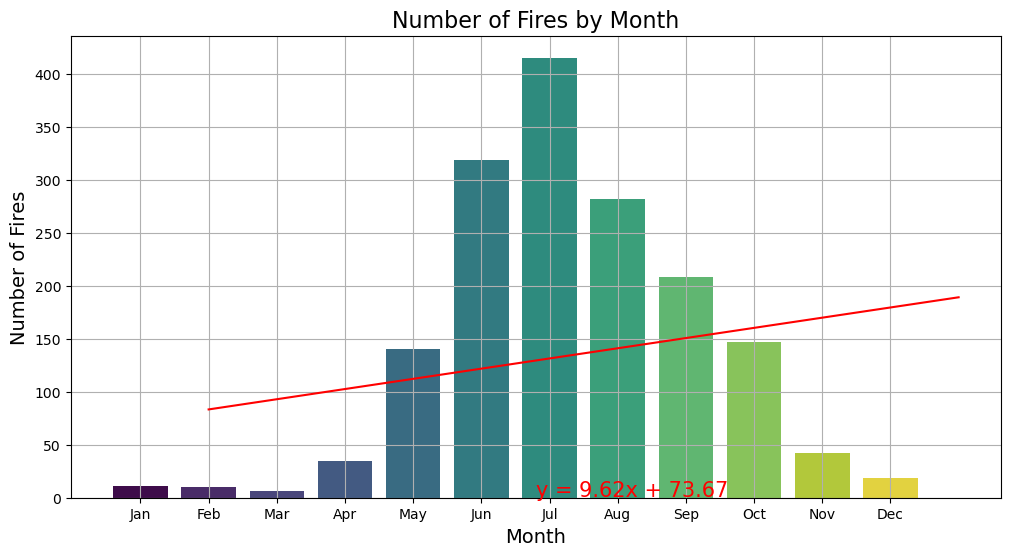

Correlation coefficient (r): 0.0578
P-value: 0.0195
R^2 Value: 0.06034475595439627


In [63]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, hue=fires_by_month.index, palette="viridis", legend=False) 
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Number of Fires by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()
# Print correlation results
print(f"Correlation coefficient (r): {month_acres_corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R^2 Value: {rvalue**2}")

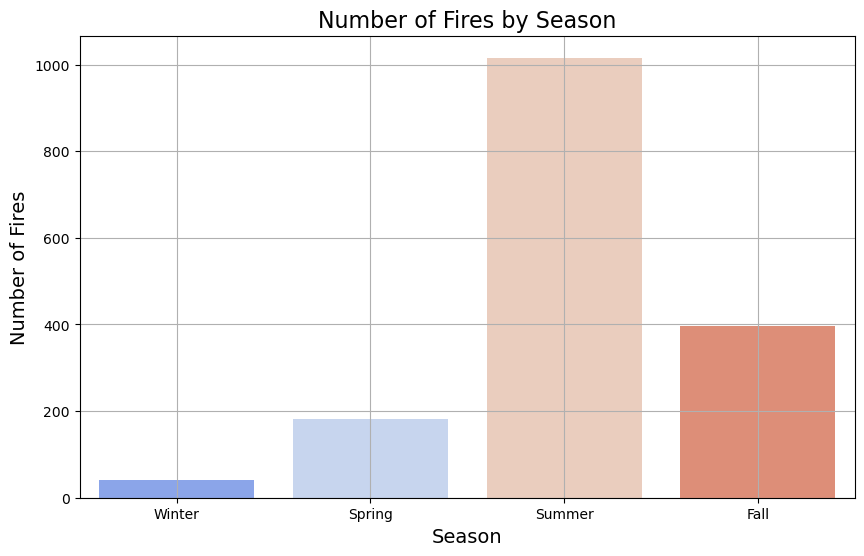

In [64]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Fall
        return 'Fall'

# Add a 'Season' column to the DataFrame
calfire['Season'] = calfire['MonthStarted'].apply(get_season)

# Group by season and count the number of fires
fires_by_season = calfire.groupby('Season').size()

# Sort seasons for proper order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
fires_by_season = fires_by_season.reindex(season_order)

# Create a bar chart for fires by season
plt.figure(figsize=(10, 6))
sns.barplot(x=fires_by_season.index, y=fires_by_season.values, hue=fires_by_season.index, palette="coolwarm")
plt.title("Number of Fires by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.grid(True)
plt.show()

month_acres_corr, p_value = pearsonr(calfire['MonthStarted'], calfire['AcresBurned'])

<Figure size 1200x600 with 0 Axes>

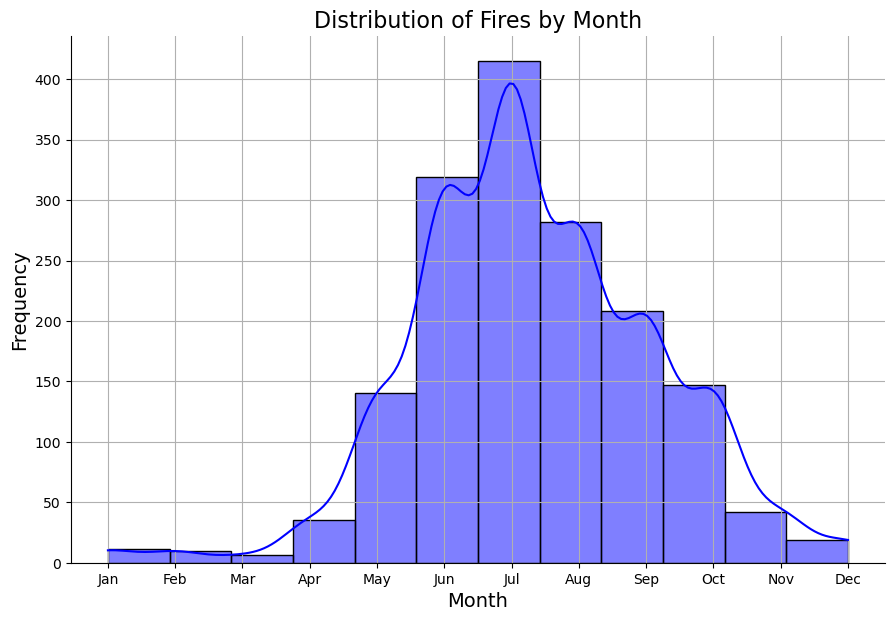

In [65]:
plt.figure(figsize=(12, 6))
sns.displot(calfire['MonthStarted'], kde=True, bins=12, color='blue', height=6, aspect=1.5)
plt.title("Distribution of Fires by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

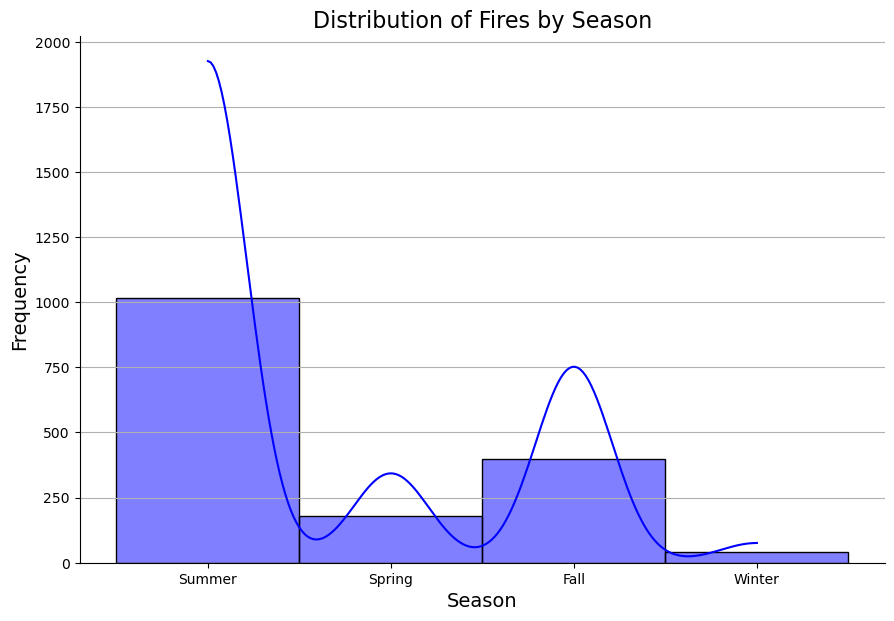

In [66]:

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the distribution by season using displot
sns.displot(data=calfire, x='Season', kde=True, bins=4, color='blue', height=6, aspect=1.5)

# Customize the plot
plt.title("Distribution of Fires by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, axis='y')

# Show the plot
plt.show()  

In [67]:
# Group data by season and count the number of fires
winter = calfire[calfire['Season'] == 'Winter']['MonthStarted']
spring = calfire[calfire['Season'] == 'Spring']['MonthStarted']
summer = calfire[calfire['Season'] == 'Summer']['MonthStarted']
fall = calfire[calfire['Season'] == 'Fall']['MonthStarted']

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(winter, spring, summer, fall)
print(f"Kruskal-Wallis H-statistic: {h_stat:.4f}, P-value: {p_value:.4f}")

Kruskal-Wallis H-statistic: 1134.8564, P-value: 0.0000
